In [1]:
# Necessary Imports
%matplotlib inline

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Read Dataset
dataset = pd.read_csv("../Data/temp_data-AllYears.csv")
dataset.head()

,Year,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,14.867167,0.308167
1,1851,14.991833,0.312083
2,1852,15.006500,0.316417
3,1853,14.955167,0.283833
4,1854,14.991000,0.276417


In [3]:
# Let X = Years & y = LandAndOceanAverageTemperature
X = dataset["Year"].values.reshape(-1, 1)
y = dataset["LandAndOceanAverageTemperature"].values.reshape(-1, 1)

In [4]:
# Split Train - 80% Train & 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Train Algorithm Using Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
# Retrieve Intercept:
print("The y intercept is:  ", regressor.intercept_)

# Retrieve Slope:
print("The slope is:  ", regressor.coef_)

The y intercept is:   [5.03304052]
The slope is:   [[0.00527395]]


In [7]:
# Make Predictions
y_pred = regressor.predict(X_test)

In [8]:
# Compare Actual To Predicted
actual_predicted_df = pd.DataFrame({"Actual" : y_test.flatten(), "Predicted" : y_pred.flatten(), "Error" : y_pred.flatten() - y_test.flatten()})
actual_predicted_df

,Actual,Predicted,Error
0,15.854417,15.649500,-0.204917
1,15.344167,15.496555,0.152388
2,15.345000,15.280323,-0.064677
3,14.954667,15.079913,0.125246
4,15.600333,15.575664,-0.024669
5,14.810417,15.074639,0.264222
6,14.758250,14.826764,0.068514
7,15.021083,14.816216,-0.204868
8,15.340667,15.501829,0.161162
9,14.776000,15.111557,0.335557


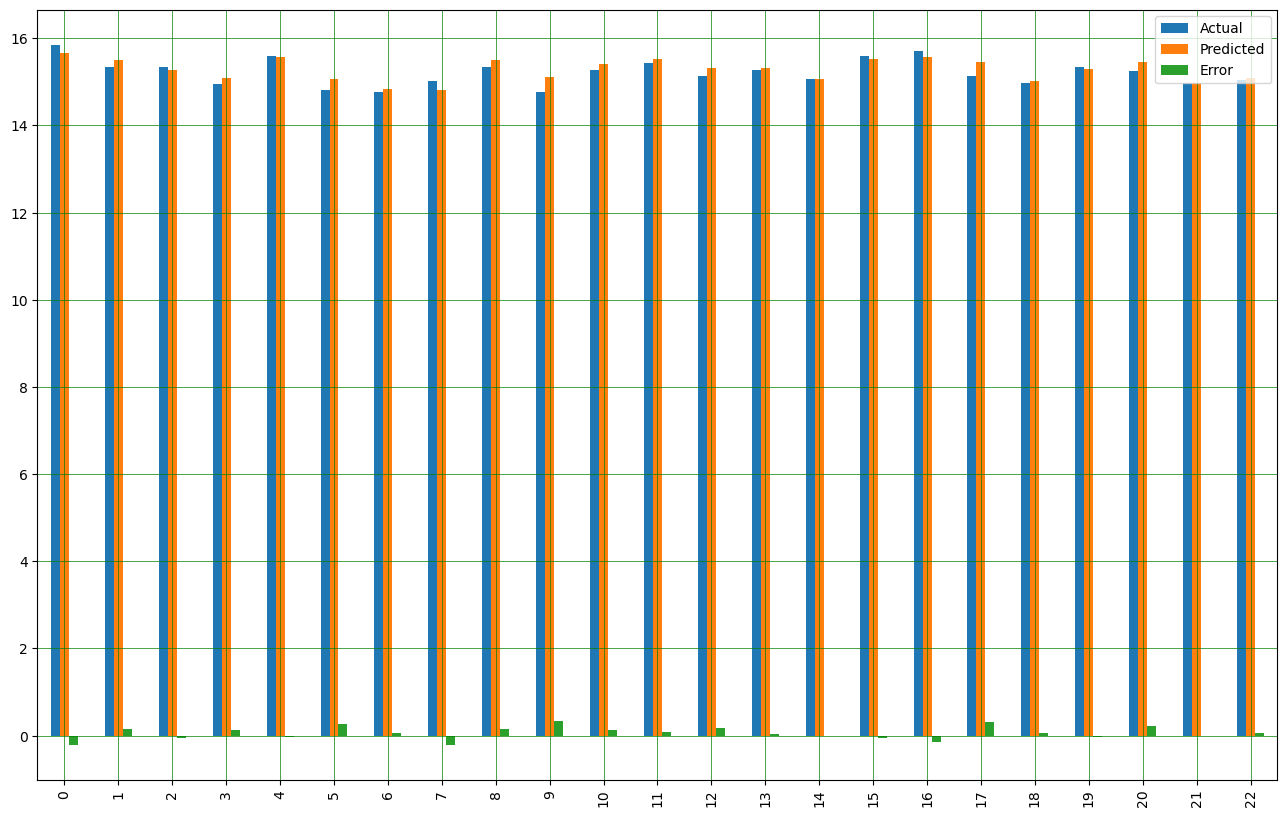

In [9]:
# Create Bar Chart
actual_predicted_df = actual_predicted_df.head(23)
actual_predicted_df.plot(kind = "bar", figsize = (16, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

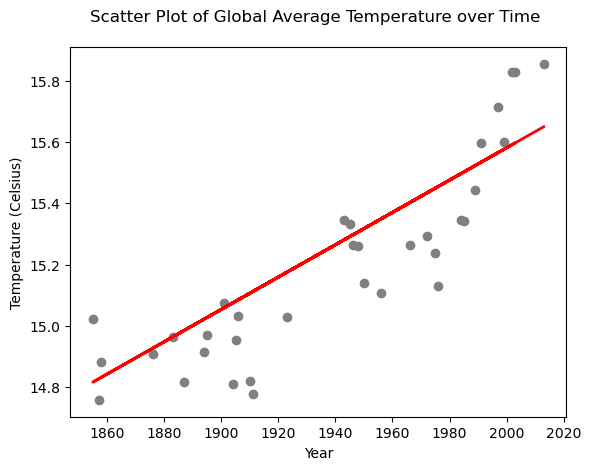

In [10]:
# Plot Straight Line With Test Data
plt.scatter(X_test, y_test,  color = "gray")
plt.plot(X_test, y_pred, color = "red", linewidth = 2)
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.title("Scatter Plot of Global Average Temperature over Time \n")
fig1 = plt.gcf()
fig1.savefig("../Images/YearToTempScatter.png", bbox_inches = "tight")

In [11]:
# Calculate Margin Of Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))  
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13596173454789284
Mean Squared Error: 0.02702573048687734
Root Mean Squared Error: 0.1643950439851437


In [12]:
x_min = X.min()
x_max = X.max()
print("Min/Max X Values (Year)", x_min, x_max)

Min/Max X Values (Year) 1850 2015


In [13]:
# Get y (Temperature Min/Max Actuals)
y_min_actual = y.min()
y_max_actual = y.max()
print("Min/Max Y Values (Temperature)", y_min_actual, y_max_actual)

Min/Max Y Values (Temperature) 14.740083333333333 16.058583333333335


In [14]:
# Y-Intercept = 5.03304052 & Slope = 0.00527395
y_min = 5.03304052 + 0.00527395 * x_min
y_max = 5.03304052 + 0.00527395 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 14.740083333333333
Calculated Min Value: 14.78984802
Actual Max Value: 16.058583333333335
Calculated Max Value: 15.66004977


In [15]:
# Predict Calculated Values
y_min_predicted = regressor.predict([[x_min]])
y_max_predicted = regressor.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 14.740083333333333
Predicted Min Value: [[14.78984586]]
Actual Max Value: 16.058583333333335
Predicted Max Value: [[15.66004742]]


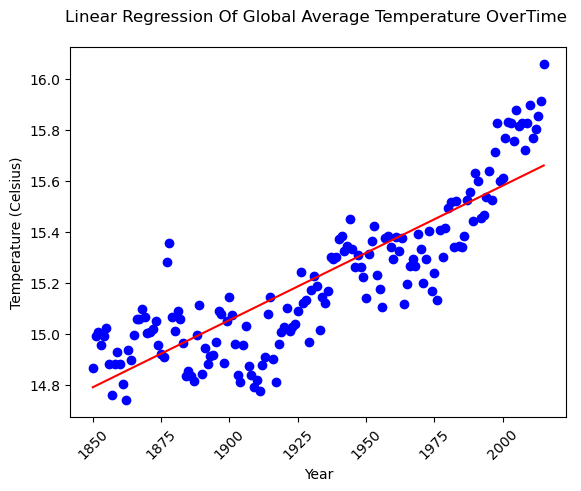

In [16]:
# Plot
plt.scatter(X, y, c = "blue")
plt.plot([x_min, x_max], [y_min, y_max], c = "red")
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.title("Linear Regression Of Global Average Temperature OverTime \n")
fig2 = plt.gcf()
fig2.savefig("../Images/YearToTempCorrelation.png", bbox_inches = "tight")

## Plugging In The Numbers:
### Average Global Temperature  =  Slope  *  CO2  +  Y-Intercept
### Slope = 0.00527395
### Y-Intercept = 5.03304052
### Global Temp. Above 1.5 Degrees C From 1850 Average Global Temperature = 16.37
### Population = (16.37 - 5.03304052)/0.00527395
### CO2 = 2,149.61451663
### Mean Squared Error: 0.02702573048687734